# 第６週：統計的検定

統計的検定とは、仮説をデータから検証する手続きのことである。仮説検定ともいうが、これは多くの研究開発プロセスに必須の手順である。伝統的に仮説検定が行われてきたのは、以下のような問題を検証するためである。

- 新しく開発した薬は、これまでの薬よりも効果が高いか
- 英語を学習する複数の教材（きょうざい）のうち、もっとも効果が高いのはどれか
- どのような肥料（ひりょう）を使うと、農産物（のうさくぶつ）の収穫（しゅうかく）が増えるか
- アンケート結果から、何を確からしいと判断できるか

これに加え、さまざまなデータが蓄積されるようになった現在、統計的検定は、従来の枠（科学的研究・工業開発）を超えて利用されるようになっている。たとえば、商業デザイン、官公庁の政策などは、これまでベテラン（年長者）、あるいは立場が上の上司の意見が、特に批判されることもなく亨ことが多かった。

しかし、年長者の経験が必ずしも正しくないことが、データにもとづく（data driven）検証によって、つぎつぎと明らかになっている。

- 自動販売機（じどうはんばいき）で商品（缶ジュース）を並べるのに、売れ筋を強調する方法が考えられてきた。これまで「Zの法則」が取り入れられてきたが、アイキャプションカメラを導入した検証では、じつは効果的ではないことが明らかになった。

[外部サイト：視線の動きが物語る“消費者の本音”](https://japan.cnet.com/article/35057823/2/)

- 少人数教育（しょうにんずうきょういく）を導入（どうにゅう）すれば児童の学力は上がると信じられているが、多くの実験によれば、それは必ずしも明らかではない。

[外部サイト：少人数学級政策の不都合な真実](https://synodos.jp/education/12530)

議論・ディスカッションは重要だが、えてして、声の大きい人の意見が根拠もなく通ることがある。

統計的検定では、意見や提言を主張した人の立場（経験や年齢、立場）ではなく、データをエビデンスとして、決定を行う。

なお、この講義（および第５週講義）のPythonコードを以下に公開している。

[外部サイト：GitHub](https://github.com/IshidaMotohiro/IshidaMotohiro.github.io/blob/master/DataScience.ipynb)

### 要約ビデオ

今回の内容についての過去の講義の録画を公開している。なお、Bクラス、Cクラスの受講生は、この講義動画とは別に、担当の先生（宋先生、谷岡先生）独自の講義配信が行われる場合もあるので、注意すること。

統計的検定について（上記コンテンツに関わる過去の講義の録画です：stream　徳島大学アカウント（c123456789@tokushima-u.ac.jpなど）でログイン必要）

<iframe width="640" height="360" src="https://web.microsoftstream.com/embed/video/256656bb-033a-47e7-aeee-1b016b10a089?autoplay=false&amp;showinfo=true" allowfullscreen style="border:none;"></iframe>


## 6.1　差があるとは

この講義の最初に、「管理職は毎月20から30の会議に出席しなければならない」という主張を、データサイエンスの立場から検討した。復習になるが、データの数字が大きいか小さいかの判断は、もちろん個人によって異なるだろう。しかし、データを共有し、このデータにもとづいた判断を行おうとする場合、個々人の印象（いんしょう）で議論を進めるわけにはいかない。

データサイエンスにおいて、データから判断を行おうとする場合、そのデータがどのように成立しているのかを考える。特に、データの**分布**を考えることは重要である。データの分布とは、どのような数値が、どれくらいの割合で出現するかを指す。

ポアソン分布は、期待値（きたいち）をパラメータとする分布である。つまり、期待値が決まると、分布も決まる。分布が決まるとは、0回や1回、あるいは2,3,4回といった回数となる確率が定まることを意味する。

ポアソン分布を仮定すると、例えば、管理職が毎月会議に出席する回数が20回を超える確率は約0.51だと計算することができるようになる。しかし、このこと自体は、それほど有益な（ゆうえきな、役に立つ）情報ではないだろう。

ここで主張を、**「管理職は一般職よりも出席会議数が多い」**としてみよう。

まず、会社の管理職から（無作為に、ランダムに）11人を選び出し、先月の出席会議回数を報告してもらった調査結果だったとする。

<center>
管理職11人の先月の会議出席数

| 1人目 | 2人目 | 3人目 | 4人目 | 5人目 | 6人目 | 7人目 | 8人目 | 9人目 | 10人目 | 11人目 |
|-------|:------|:------|:------|:------|:------|:------|:------|:------|:-------|:-------|
| 23    | 16    | 23    | 20    | 18    | 19    | 19    | 15    | 20    | 22     | 23     |
   
</center>

まずこのデータを Python の pandas ライブラリで、データとしてみよう。ここではベクトル（pandasの用語ではあるいはシリーズ）としてデータを保存する。

In [11]:
import pandas as pd
x = pd.Series([23, 16, 23, 20, 18, 19, 19, 15, 20, 22, 23])
x

0     23
1     16
2     23
3     20
4     18
5     19
6     19
7     15
8     20
9     22
10    23
dtype: int64

このデータの平均値、より正確には、標本平均値は約 19.82 回である。

In [12]:
x.mean()

19.818181818181817

一方、一般職が毎月出席する会議の回数の報告は以下のようであった。

<center>

一般職11人の先月の出席会議数
| 1人目 | 2人目 | 3人目 | 4人目 | 5人目 | 6人目 | 7人目 | 8人目 | 9人目 | 10人目 | 11人目 |
|---|:--|:--|:--|:--|:--|:--|:--|:--|:---|:---|
| 2 | 3 | 3 | 3 | 4 | 4 | 4 | 4 | 5 | 5  | 6  |
</center>

この平均値は約3.9回である。

In [13]:
y = pd.Series([2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 6])
y.mean()

3.909090909090909

それぞれの**標本平均値**を比較するのであれば、この場合、「管理職は一般職よりも出席会議数が多い」ことは明白である。しかし、今回求められた平均値は、標本のとり方（つまり、管理職および一般職の代表として誰を選ぶのか）を変えると、変わってくるだろう。新しい標本では、管理職の会議出席平均値は 11 回で、一般職は 8 回になるかもしれない。この新しいデータでも管理職の方が会議出席回数は多いが、その差はわずかであり、ただの**誤差**かもしれない。

本来比較すべきなのは、管理職と一般職それぞれの**母集団**における**期待値**でなければならない。母集団は実際には調べることのできない対象であるが、標本から推定（すいてい：estimate）することができる。そして、この推定にもとづいて *仮説「管理職は一般職よりも出席会議数が多い」* が正しいかどうかを判断する方法を**仮説検定**（かせつけんてい：hypothesis test）、あるいは単に*検定*(test)という。

## 6.2　大数の法則と中心極限定理

一般に母集団の期待値は分からない。母集団全体を調べることが不可能だからだ。ところが、標本に偏りがなく、かつ標本のサイズ（データセットの要素数 $n$）が大きい場合、標本平均値は母平均値に近いことが分かっている。これを**大数の法則**（たいすうのほうそく：law of large numbers）という。

サイコロを何回か振って、出た数の平均値を考えてみよう。Pythonでは以下のようにシミュレーションできる。

In [14]:
import numpy as np
np.random.seed(123)
# サイコロを3回ふってみる
throws3 = np.random.randint(low=1,high=7, size=3)
throws3

array([6, 3, 5])

シミュレーションなので、実行するたびに出現する目は異なるので注意されたい。

In [15]:
throws3.mean()

4.666666666666667

4回の場合の平均値は以下のように求められる。

In [16]:
throws4 = np.random.randint(low=1,high=7, size=4)
throws4.mean()

3.0

ここでサイコロを1回振った時の平均値（つまり1個出た数そのもの）から、サイコロ1個を2回振って平均値を求める。サイコロ1個を3回振って平均値を求める・・・9999回振って平均値を求める、10000回振って平均値を求めるということを繰り返す。サイコロを振る回数を毎回１つ増やして、平均値を求めることを1万回繰り返す。この、それぞれの平均値を折れ線グラフで表現してみよう。なお、X軸は振った回数で、Y軸は平均値である。

<Axes: xlabel='N', ylabel='throws'>

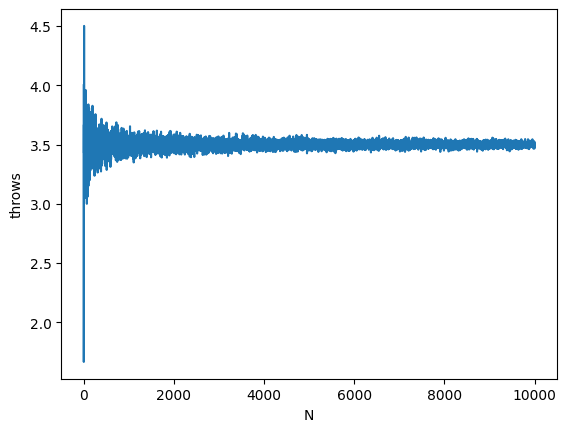

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
results = []
for num_throws in range(1,10000):
    throws = np.random.randint(low=1,high=7, size=num_throws)
    mean_of_throws = throws.mean()
    results.append(mean_of_throws)
df = pd.DataFrame({'N':range(1,10000), 'throws' : results})
df
sns.lineplot(x='N',y='throws', data=df)

グラフのX軸は、何回サイコロを振ったかで、左端は1回だけ振って求めた平均値（つまり分母が１である）で、右端は1万回振って求めた平均値（分母は10000）である。Y軸（標本平均値）の値は、X軸の左側では毎回かなり変動しているが、右にいくほど、変動が小さくなっている。つまり 3.5 に集中するようになっている。これが大数の法則である。

[外部サイト：ウィキペディア：大数の法則](https://ja.wikipedia.org/wiki/%E5%A4%A7%E6%95%B0%E3%81%AE%E6%B3%95%E5%89%87)

### 中心局限定定理

もう一つ、データサイエンスにおいて重要な定理（ていり）に、**中心極限定理**（ちゅうしんきょくげんていり：central limit theorem）がある。

これは、ある平均値 $\mu$ とある分散 $\sigma^2$ にしたがう、ある分布から取り出した確率変数 $ X_1 ,X_2, \dots, X_n$ は、$n$ が大きい場合（つまり標本サイズが大きい場合）、これらの確率変数を使って計算した $Z$ 値が標準正規分布（ひょうじゅんせいきぶんぷ）にしたがう、という定理である。

$$
Z = \frac{\bar{X} - \mu}{\sqrt{\sigma^2/n}} 
$$

簡単にいってしまうと、標本サイズが大きい場合、標本平均値と母平均値の「差」は、平均が 0 で分散が $\frac{\sigma^2}{n}$ の正規分布に近づくということである（なので、$¥sqrt{\frac{\sigma^2}{N}}$ で割ると分散は1になる、つまり標準正規分布になる）。これは**中心極限定理**（ちゅうしんきょくげんていり：central limit theorem）と呼ばれる。

これを試してみよう。正規分布**ではない**確率分布として、二項分布、ポアソン分布、幾何分布（きかぶんぷ）、指数分布（しすうぶんぷ）の4つを例にしよう。

二項分布とポアソン分布についてはすでに紹介した。幾何分布（きかぶんぷ：geometric distribution）は、たとえばサイコロである数字（例えば、３）が出るまでに必要な試行回数の分布を表す。指数分布（しすうぶんぷ：exponential distribution）は、たとえば機械が故障してから次に故障するまでの期間などを表す分布である。以下のURLなども参照されたい。

[出典：外部サイト：ウィキペディア：幾何分布](https://ja.wikipedia.org/wiki/%E5%B9%BE%E4%BD%95%E5%88%86%E5%B8%83)

[外部サイト：ウィキペディア：指数分布](https://ja.wikipedia.org/wiki/%E6%8C%87%E6%95%B0%E5%88%86%E5%B8%83)

これら４つの確率分布はそれぞれ、以下に示すグラフにあるような形状となる。以前に説明したように、パラメータ（期待値）によって分布の形状は異なってくるのだが、ここでは二項分布と幾何分布には 0.5 を、ポアソン分布には1、指数分布には2を指定している。

Text(0.5, 1.0, 'Exponential')

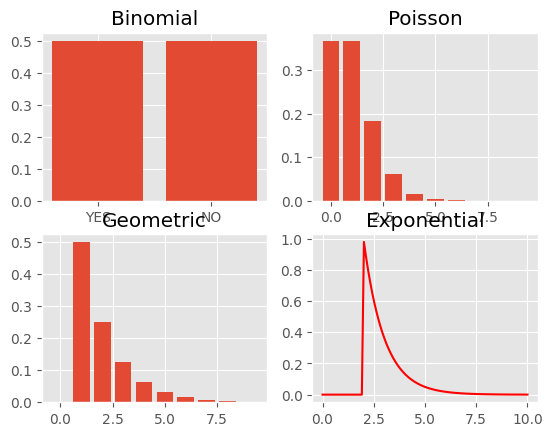

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import numpy as np
plt.style.use('ggplot')

fig = plt.figure()
## 下で作成するグラフでは fig, axes = plt.subplots(nrows=2, ncols=2) としているので比較しよう

axes1 = fig.add_subplot(2,2,1)
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)
## 二項分布(ベルヌーイ試行のパラメータ 0.5)
axes1.bar(['YES','NO'], [0.5,0.5])
## ポアソン分布（パラメータ1）
x =  np.arange(0, 10, 1)
y = [ss.poisson.pmf(i, 1) for i in x]
axes2.bar(x,y)
## 幾何分布（パラメータ0.5）
x =  np.arange(0, 10, 1)
y = [ss.geom.pmf(i, .5) for i in x]
axes3.bar(x,y)
## 指数分布（パラメータ2.0）
x = np.linspace(0,10,100)
y = [ss.expon.pdf(i, 2.0) for i in x]
axes4.plot(x,y,'r')

axes1.set_title('Binomial')
axes2.set_title('Poisson')
axes3.set_title('Geometric')
axes4.set_title('Exponential')

なお、この講義でPythonにおけるグラフ作成の詳細については、必要があればWEB会議などで質問を受け付けるが、以下に紹介するサイトなども参照されたい。

[外部サイト：Qiita：グラフ作成のためのチートシートとPythonによる各種グラフの実装](https://qiita.com/4m1t0/items/76b0033edb545a78cef5)

ちなみに、**matplotlib**や**seaborn**、あるいは、Pythonのライブラリ一般については、Googleなどで検索して時間をつぶすよりは、それらのパッケージのサイトを直接確認したほうが、結局は、解決への早道であることも多い。

[外部サイト：matplotlib](https://matplotlib.org/)

[外部サイト：seaborn](https://seaborn.pydata.org/)


以下のグラフ作成処理を簡単に説明すると、まず画像（キャンバス）に相当するオブジェクトを **matplotlib**の`figure()` で作成し、この領域を `add_subplot()` でサブプロットに分割し、それぞれに名前をつけている（まとめて配列にすることも可能である）。ぞれぞれのプロット（グラフ）は、このサブプロット領域（Pythonでは `axe` と表現する）に描いていく。

ここで、これら４つの分布からランダムに標本を2万個を取り出して平均値を求めることを、3万回繰り返してみよう。つまり、二項分布、ポアソン分布、幾何分布（きかぶんぷ）、指数分布（しすうぶんぷ）それぞれから取り出した標本の平均値が、それぞれ3万個求まることになる。ただし、以下のコードは実行結果がかえってくるまで数秒かかる。その間、パソコンがフリーズしたような印象を受けるかもしれないが、画像が表示されるまでしばらく待つように。

In [19]:
import pandas as pd
samples_binom = []
samples_possion = []
samples_geometric = []
samples_exp = []
size = 20000

for n in range(1,30000):
    samples = np.random.binomial(1, 0.5, size=size)
    samples_binom.append(samples.mean())
    samples = np.random.poisson (lam=1, size=size)
    samples_possion.append(samples.mean()) 
    samples = np.random.geometric(p=0.5, size=size)
    samples_geometric.append(samples.mean())
    samples = np.random.exponential(scale=2.0,size=size)
    samples_exp.append(samples.mean())

df = pd.DataFrame({ 'binomial' : samples_binom, 
                     'poission' : samples_possion,
                     'geometric' : samples_geometric,
                    'exponential' : samples_exp})

それぞれの結果をヒストグラムにしてみよう。


Text(0.5, 1.0, 'Exponential')

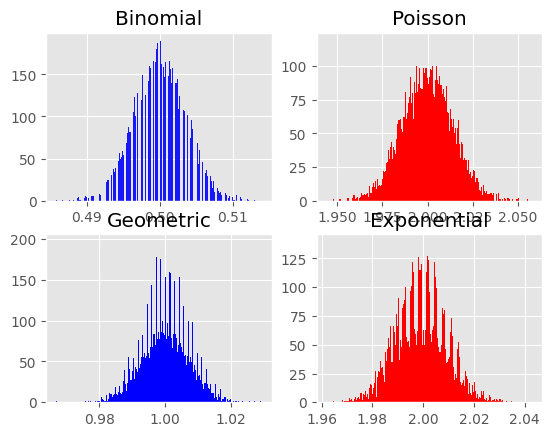

In [20]:
from matplotlib import pyplot as plt
## グラフを分割する方法が上で、各確率分布の外形を
## 作成した場合と異なるので比較してみよう
fig, axes = plt.subplots(nrows=2, ncols=2)
df.binomial.hist(color='blue',ax=axes[0,0], alpha=0.9, bins=1000)
df.exponential.hist(ax=axes[0,1],color='r',bins=1000)
df.poission.hist(ax=axes[1,0],color='blue',bins=1000)
df.geometric.hist(ax=axes[1,1],color='r',bins=1000)

axes[0,0].set_title('Binomial')
axes[0,1].set_title('Poisson')
axes[1,0].set_title('Geometric')
axes[1,1].set_title('Exponential')

ややいびつではあるが、いずれのヒスグラムも左右対称の釣り鐘型に近い。つまり、正規分布を特徴づけるグラフに近いことが確認できるだろう。

標本平均値と母平均値の差を**標準誤差**（ひょうじゅんごさ）で割った $Z$ が、平均値が０で標準偏差が１の標準正規分布にしたがうことを、$Z \sim N(0,1)$ などと表記する。これは簡単にいうと、グラフの山の中心がX軸の０の位置にあり、また誤差の広がり（左右の裾、すそ：tail）がだいたい-４から＋４の範囲でおさまることを意味する（理論的には $- \infty$ から $\infty$ の範囲であるが）。

なお、**標準誤差**（ひょうじゅんごさ：standard error）とは、標本標準偏差 $s$ をデータ数の平方根（へいほうこん）で割った値である($\frac{s}{\sqrt{n}}$)。標準誤差は、標本平均値が母平均値とどれくらいずれているか（ばらついているか）を表す。

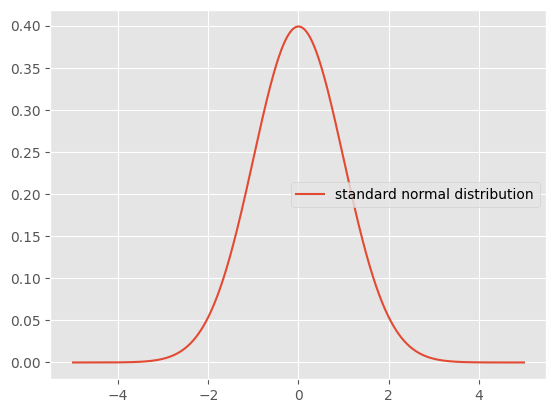

In [21]:
import scipy.stats as ss
x = np.linspace(-5, 5, 5000)
mu = 0
sigma = 1
pdf = ss.norm.pdf(x, mu, sigma) # the normal pdf
plt.plot(x, pdf, label='standard normal distribution')
plt.legend()

標準正規分布ではデータの95％が約-1.96 から約 1.96 の範囲におさまることになる。逆にいうと、データが標準正規分布にしたがっているのであれば、-1.96より小さい値や、1.96よりも大きな値は、それぞれ 2.5％の確率でしか生じないことになる。たとえば「平均値が0で標準偏差が1の分布から出てきた数値」だとして−2.0未満の値が示された場合、このような小さな値が得られる確率は2.5％にすぎないので、非常に珍しい数値であるといえるだろう。ただし、2.5％の確率でしか生じないような数値が得られるのはおかしい、変だと疑うこともできる。なにがおかしいのか？それは、そのデータが得られた母集団に、平均値が0で標準偏差が1の分布を想定していることがおかしいのである。<u>本当は</u>、それは間違いで、この-2.0未満の数値は、<u>本当は</u>平均値が−2で標準偏差が1の分布から出てきたのではないかと疑うことができる。

もっと積極的にいおう。平均値が0だと想定しているのに、データとして−2が得られた。しかし、−2（未満）の値が得られる確率は2.5％しかない。だから、平均値が0だと想定しているのがおかしいのだ。つまり、このデータは別の母集団分布（たとえば平均値が−2の正規分布）から得られているのだ。平均値がそもそも違うのだ。

**このようなロジックで、「平均値の違い」を示すのが、統計的検定なのである。**

この考え方を、会議出席回数に応用しよう。さらに、簡単のため、会議出席数が（残念ながら）ある程度多いので、ポアソン分布を仮定しても、正規分布を仮定しても、そんなに大きな違いはないと考え、ここでは会議出席回数を正規分布として考えよう（後述する）。

すると、管理職11人の会議出席回数の標本平均値が約19だったとして、それが一般社員の会議出席数の母平均値と想定される値に近いかどうかを検討することができる。といっても、母平均値はわからないのだが、一般社員の会議出席回数の平均値として（ここでは適当に）10回を想定してみよう。つまり、平均値が10の母集団を仮定するのである。**母**平均値が想定できれば、管理職の**標本**平均値との差を $Z$ 値に変換することができる。求めた $Z$ が-1.96 から 1.96 の間にあれば、管理職の標本平均値は、母平均値（と仮定した一般社員の会議出席回数の平均値10）に近いと判断できる。ところが $Z$ の絶対値が 1.96を超えているのであれば、管理職の標本平均値は母平均値から離れている、**違っている**と考えるのである。

もちろん、たまたま今回の標本は極端なデータになってしまったのかもしれない（その確率が2.5％ないし5％あることになる）。ただし、別の考え方もできる。そもそも管理職の会議出席回数は、一般社員とは異なる分布なのだ。これが、「管理職の会議出席回数は、一般職の会議出席数よりも多い」ということなのである（厳密にいえば、「異なる」と「より多い」あるいは「より少ない」を区別しなければならないが、これは後述する）。

ただし、実は、母平均値を設定するだけでは、$Z$ は計算できない。*母*標準偏差が分からないからである。すぐに思いつくのは、*標本*標準偏差を代わりに利用することだが、実は、$Z$ を求める式で母標準偏差の代わりに標本標準偏差を使うと、$Z$ はもはや正規分布にしたがわない。その分布は t分布と呼ばれる。

## 6.3　t検定

**t分布**は、ギネスブックで有名なギネス醸造所（Guinnessぞうじょうじょ、ビールの生産工場）で、技師として勤めていたウィリアム・ゴセット(William Sealy Gosset,1876-1937)によって調べられた分布である。標本平均値はデータセットの数($N$)が大きくなれば、母平均値に近づくこと（大数の法則）は前節で述べたが、だからといってビール醸造所（ビールを生産する工場）では検査のために大量の標本を取り分けるにはいかない。そのため、ゴセットは、標本数が少ない場合でも、標本平均値の正確さを知る必要に迫られていたのである。

t分布は以下のような形をした分布である。パラメータ（以下に説明する）の異なる３つのｔ分布と、比較のため標準正規分布を重ねている。

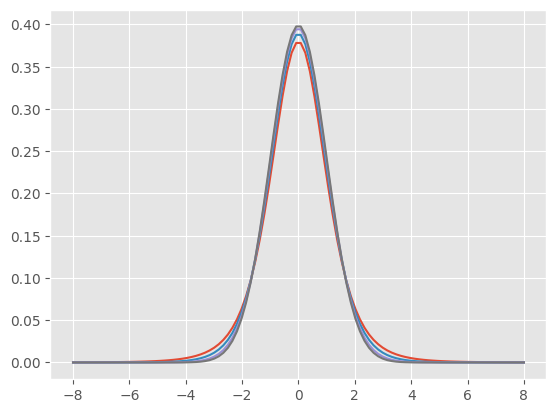

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.linspace(-8,8,100)
for t in [5,10,30]:
    t_pdf = ss.t.pdf(x=x, df=t)
    ax.plot(x, t_pdf, label='t dist={}'.format(t))
ax.plot(x, ss.norm.pdf(x), label='normal dist')

t分布の形は**自由度**(じゆうど：degree of freedom)というパラメータで決まる（実は、他に位置を決めるパラメータもありベイズ推定ではよく指定するが、ここでは利用しない）。自由度とはなにか？直感的に説明すると、このデータの場合、標本に11個の値があり、ここから標本平均値が求められている。標本は抽出のたびに変わりうるが、標本平均値をいったん固定して考えると、11個の値のうち、変動しうるのは10個までである（各自で、その理由を考えてみてほしい）。これが自由度である。統計的検定では、自由度という表現がしばしばでてくるので、意識はしておいてほしい。

t分布は自由度が大きくなると、その形状はほぼ正規分布に一致する。

このt分布にもとづいて、ある標本平均値が、別の平均値と異なるかどうかを調べる検定方法が考案されており、これを**t検定**、あるいは平均値の検定と呼ぶ。もういちど、繰り返すと、平均値が実は異なることを調べるには、$Z$値を求めれば良いのだが、$Z$値を計算するためには、*母*標準偏差の情報が必要である。が、一般には、データの*母*標準偏差の情報はない。そこで、母標準偏差のかわりに*標本*標準偏差を利用するのである。ただし、*標本*標準偏差で代用した分布はもはや正規分布ではなく、t分布になるのである。

管理職11人の先月の会議出席数が以下のようであったとする。

<center>
管理職11人の先月の会議出席数

| 1人目 | 2人目 | 3人目 | 4人目 | 5人目 | 6人目 | 7人目 | 8人目 | 9人目 | 10人目 | 11人目 |
|-------|:------|:------|:------|:------|:------|:------|:------|:------|:-------|:-------|
| 23    | 16    | 23    | 20    | 18    | 19    | 19    | 15    | 20    | 22     | 23     |
   
</center>

この標本平均値と、一般職が毎月出席する会議数の平均値（と想定する）10回は、どれくらい差があるかを検証してみよう。このようか検証方法を**t検定**という。

ただし、本書の最初で、会議数出席回数の分布にはポアソン分布をあてはめることができると述べた。実はt検定は、**データの分布が正規分布にしたがうことを仮定**している。つまり、会議への出席回数の平均値を検定する方法としてt分布は適切ではない。

ただし、管理職の出席回数の分布をグラフで確認すると、ほぼ左右対称になっていた。再掲（さいけい）する。

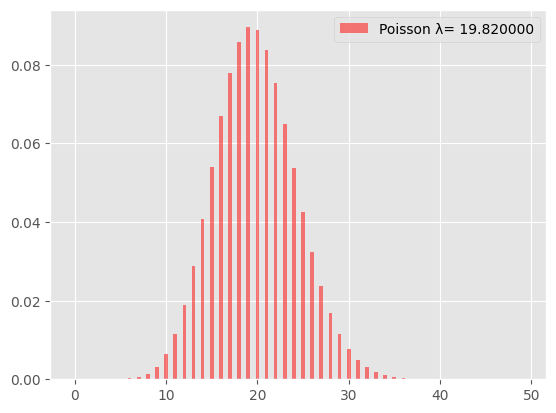

In [23]:
x =  np.arange(0, 50, 1)
y = [ss.poisson.pmf(i, 19.82) for i in x]
fig = plt.figure()
ax = fig.subplots()
ax.bar(x, y, align="center", width=0.4, color="red",
                alpha=0.5, label="Poisson λ= %f" % 19.82)
plt.legend()


ポアソン分布で生起回数の平均値が大きい場合には、正規分布に近い分布になることが分かっている。あるいは言い方を変えると、パラメータの値が大きい場合、ポアソン分布は正規分布で近似（きんじ）できる。

そこで、管理職の会議出席数が正規分布するとみなして、その標本平均値が、一般職の（標本）平均値である約 4 と異なるかどうかをt検定で調べてみよう。

まず t 値を計算する。理論式通りに計算すると以下のようになる。

In [24]:
x = pd.Series(np.array([23, 16, 23, 20, 18, 19, 19, 15, 20, 22, 23])) 
t_value = (x.mean() - 4.0)/ (x.std() /np.sqrt(11))# T-value
t_value

18.828699007716516

標本として選んだ管理職11名の会議出席回数の標本平均値と、一般職の標本平均値 4.0 の差からもとめたt値は大きいのだろうか、小さいのだろうか？

これは確率的に判断する。
Pythonの `t.cdf()` は累積確率をもとめる。つまり、ある t 値以下となる確率である。よって、この値を1.0から引けば、指定された t 値より大きな値が得られる確率が求まる。なお ｔ分布は自由度によって形状が異なるため、パラメータとして自由度を指定する(`df=10`)。ここで自由度は管理職のデータサイズから1を引いた数である。


In [25]:
1 - ss.t.cdf(t_value, df=10)

1.9341436230391196e-09

約1.93e-09と求まるだろう。


この確率はほとんど0である。この意味は、もしも一般社員の平均的な出席回数（4.0回）を基準とすると、管理職らの平均的な出席回数が20を超えるような可能性はほとんど無いということである。だとすれば、管理職の会議出席回数の分布として、社員一般の会議出席回数の分布を想定するのは不適切だと結論付けられる。つまり、「管理職は一般職よりも出席会議数が多い」が確率的に示されたことになる。この手順を**検定**という。また、t検定で求められた確率を ｐ値（ぴーち）という。

## 6.4　帰無仮説と対立仮説

前節で、管理職と一般職で会議出席回数が異なることを、t分布を使って検定した。仕組みについてやや細かく説明したが、さぞかし煩雑（はんざつ、めんどう）に思えたことだろう。一般的には、検定（この例ではt検定）の手順は形式化されており、統計ソフトを利用すれば、検証は簡単にできる。

検定では、まず**帰無仮説**（きむかせつ：null hypothesis）と呼ばれる仮説を立てる。これは、「差がない」あるいは「平均値は等しい」に相当する仮説である。会議出席数の例でいえば、管理職と一般職で出席回数の平均値に差はないとするのが帰無仮説である。一方、「差がある」「違いがある」とするのが**対立仮説**（たいりつかせつ：alternative hypothesis）である。検定では、帰無仮説のもとで（帰無仮説が正しい、成立しているものとして）、差の大きさを確率的に判断する。この確率がある基準値（きじゅんち）より小さければ、分析に使ったデータは非常に珍しい標本であると判断される。一般に基準値としては5％や1%が使われる。

検定のルーティンでは、ごく稀な（まれな、めずらしい）ことが起こった（たまたま平均値が極端に大きい、あるいは小さい標本が手に入ってしまった）とは考えない。そうではなく、こんな稀なことが起こるのはおかしいと判断する。そこで、帰無仮説が正しいという前提（ぜんてい）が間違っていると考え直すのである。すなわち、帰無仮説を**棄却**（ききゃく：reject）して、対立仮説を**採択**（さいたく:accept）する。対立仮説は、要するに「差がある」ということなので、**有意な差**（ゆういなさ：a significant difference）があると表現することもある。

ただし、帰無仮説が正しくとも、本当に稀に、平均値が極端な標本が得られることはあるから、対立仮説を採択してしまう**間違い**が、基準値の確率（5％など）で生じることは意識しておかなければならない。これを統計学では**第１種の誤り**（だいいっしゅのあやまり：Type I error）と表現する（後述する）。ちなみに、帰無仮説が間違っているのに、これを棄却しないことを**第２種の誤り**（だいにしゅのあやまり：Type II error）という。

### 6.4.1　Python による検定

Pythonでt検定を実行してみよう。

まず帰無仮説は、「管理職の会議出席数の平均値は、母集団の平均値4.0回と同じである」である。一方、対立仮説は、「管理職の会議出席数の平均値は4.0回ではない」となる。Pythonでは **scipy** ライブラリの `ttest_1samp()` （アンダーバーの次の文字は数字の１である）にデータのリストと、母平均値 `popmean=4.0`を指定する。

In [26]:
x = pd.Series(np.array([23, 16, 23, 20, 18, 19, 19, 15, 20, 22, 23]))
t,p = ss.ttest_1samp(x,popmean=4.0)
print("t value = {}:  p-value = {}".format(t, p))

t value = 18.828699007716516:  p-value = 3.8682873216199875e-09


出力には、t値が約18.83, p値 が約3.87e-09と出力されている。実は、このp値は、前節で求めた約1.93e-09の２倍になっている。t検定では両側検定（りょうがわけんてい：two-sided test）と片側検定（かたがわけんてい：one-sided test）という二つのオプションがある。両側検定で「差がある」とは、比較対象の平均値（いまの例でいえば、一般職の会議出席回数の*母*平均値と仮定した4.0）より、極端に大きいか、極端に小さいかのどちらかである確率を求める。母平均値の4.0回とは「違う」というのは、4.0回よりも（極端に）多いか、（極端に）少ない場合も含まれる。プラスのt値は「多い方」の確率である。そのため、「少ない方」の確率も求めなければならないが、t分布は左右対称なので、「多い方」の確率を2倍すればよい。それがPythonでの出力の3.87e-09である。

t 分布（と正規分布）では、片側が５％の場合と、両側あわせて５％となる場合の確率は異なるので、両側検定と片側検定では、結果が異なる可能性がある。（もっとも、今我々が扱っている会議出席数のデータでは、どちらにせよ「有意差がある」と判断されるが）。

In [27]:
# 左右で５％となる場合の右側のt値
print(ss.t.ppf(0.975,df=10))
# 片側だけで５％となる場合のｔ値
print(ss.t.ppf(0.95,df=10))
# ss.t.isf(0.05,df=10)

2.2281388519649385
1.8124611228107335


Text(0.5, 1.0, 'for TWO tailed Hypothesis Test:right tail t value :2.23')

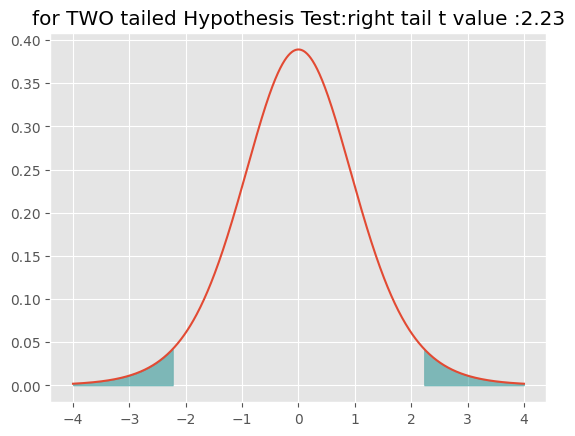

In [28]:
x = np.linspace(-4, 4,1000)
import scipy.stats as ss
import matplotlib.pyplot as plt
t_pdf = ss.t.pdf(x=x, df=10)
x2 = np.linspace(2.23,4,100)
x3 = np.linspace(-4, -2.23,100)
plt.plot(x, t_pdf)
plt.fill_between(x2, ss.t.pdf(x2,df=10), alpha=0.45, color='teal')
plt.fill_between(x3, ss.t.pdf(x3,df=10), alpha=0.45, color='teal')
plt.title("for TWO tailed Hypothesis Test:right tail t value :2.23")

<!-- ![](images/two-tailed.png)-->

一方、比較の平均値よりも大きい（あるいは小さい）を調べるのが、片側検定である。

Text(0.5, 1.0, 'for ONE tailed Hypothesis Test:right tail t value :1.81')

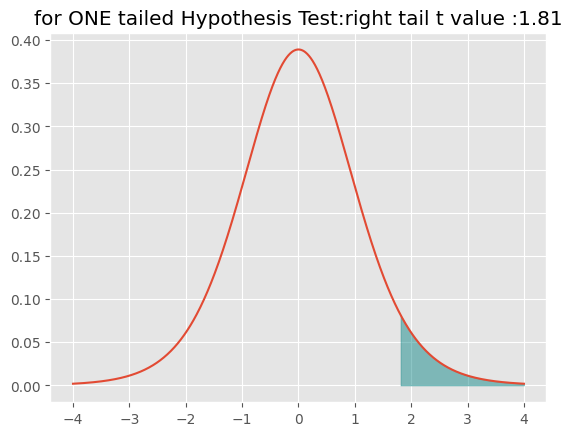

In [29]:
x = np.linspace(-4, 4,1000)
import scipy.stats as ss
import matplotlib.pyplot as plt
t_pdf = ss.t.pdf(x=x, df=10)
x2 = np.linspace(1.81,4,100)
# t_2 = ss.t(x2, df=10)
plt.plot(x, t_pdf)
plt.fill_between(x2, ss.t.pdf(x2,df=10), alpha=0.45, color='teal')
plt.title("for ONE tailed Hypothesis Test:right tail t value :1.81")

両側検定の場合、左右の両方の裾の部分が確率となるが、ｔ分布は左右対称なので、片方の値を2倍すればp値が求まる。これに対して、「より大きい」を調べる片側では、小さい方の裾の面積分（つまり確率）を右の裾に加えて考える必要がある。

Pythonの**spicy**ライブラリでは、実は両側検定しかできない（正確にいうと、できないわけではないが、面倒である）。一方、Pythonの**statsmodels**ライブラリには片側検定を指定できる関数がある。Anaconda以外の方法でPythonをインストールしている場合には、`pip3 install statsmodels`  を実行しておこう。

In [30]:
from statsmodels.stats.weightstats import ttest_ind
ttest_ind(x, [10], alternative="larger")

(-4.321475416486785, 0.9999914757448681, 999.0)

両側検定と比べると、p値が大きくなっている。出力の最後にある 10.0 は**自由度**で、この場合データの数($N$)から 1 を減じた値である。

いずれにせよ、検定を実施する前に棄却する基準値をきめておく。一般には5％が使われるので、この基準からすると、帰無仮説は棄却され、対立仮説が採択される。つまり、「管理職の会議出席回数は一般職よりも多い」と判断される。

ちなみに、仮にp値が5％以上だった場合は、帰無仮説は棄却されないことになるが、注意が必要なのは、**帰無仮説が正しいと証明されたわけではない**ことである。今回の標本からは、帰無仮説を棄却する根拠が得られなかったというだけである。この場合、帰無仮説を保留（ほりゅう：hold）するという。

## 6.5　二標本の平均値の比較

前節では、管理職の平均出席回数が、一般職の場合に想定される平均値（具体的には4.0回）と同じかどうかを検定した。これを一標本の平均値の比較という。

一方、想定される平均値も、別の標本データから求められている場合は、2つの標本それぞれの平均値が一致するかどうかを検定することになる。これを、**2標本の平均値の検定**(2 sample t test)という。今回のデータのように、管理職と一般職それぞれから選ばれた社員の先月の会議出席回数がデータとしてあるので、二標本の平均値の比較を実行するのが適切である

ただし、先に検討したが、一般職の会議出席数については、その分布はポアソン分布が適当だと思われる。これに対して、この節で紹介しているt検定は、**データの分布が正規分布にしたがっている**ことを前提としている。そのため、厳密（げんみつ）にいえば、会議出席数のデータにt検定を適用するのは適切ではない。

一方、t検定には**頑健性**（がんけんせい：robustness）があるといわれる。この場合、頑健性とは、前提（ぜんてい）が多少みたされていなくとも、検定結果は信頼できるということである。t検定の前提は、次の３点である。

1. 母集団が正規分布であること（正規性：せいきせい normality）
2. 二群の分散が等しいこと（等分散性：とうぶんさんせい homoscedasticity）
3. 標本がたがいに独立していること（独立性：どくりつせい independency）

最後の**標本の独立**とは、一方の標本の観測値が、他方の標本の観測値に影響を与えていないことをいう。たとえば、一般社員ではあるが補佐役（ほさやく、助手）として管理職の会議にも出席している場合、その一般職社員の会議出席回数は、管理職の会議開催数に依存（いぞん：depend）することになるため、独立とはいえない。なお、今回のデータでは、二つの標本は独立であると考えよう。

ちなみに、同じ対象を2回測り、それぞれの平均値の違いを調べたい場合がある。典型的な例としては、薬を飲んだ前後の血圧の違いや、ダイエットをする前後の体重の違いである。この場合も、二つの標本は独立ではない。同じ対象が2回計測されているからである。もともと血圧が高い人は、たとえ薬を飲んでたしょう血圧が下がったとしても、一般的な基準からすると、あいかわらず血圧が高めである可能性があるだろう。また、もともと太っていていた人は、ダイエットで多少体重が減ったとしても、一般的には、体重が多い方に分類される可能性がある。このような場合、データには**対応がある**(paired)と表現する。対応があるデータでは、対象ごとに前後の測定値の差を出すことができるのであれば、この差を使って標本平均値に差があるかどうかを調べることはできる。これを**対応のある平均値の検定**(paired two sample t test)という（これに対して、対応のない検定を independent 2 sample  t-testと表現する）。

正規分布の仮定については t検定は頑健であるといわれる。それは、先に述べた中心極限定理によって、標本のサイズ($N$)が大きくなると、その標本平均値の分布は正規分布に近づくからである。ただし、一般には t検定を実施する前に、標本に対して正規分布を仮定して問題ないかどうかを確認することが勧められてきた。このばあい、正規性の検定としてシャピロ・ウィルク検定などが適用される。

In [31]:
import scipy.stats as ss
ss.shapiro(x)
ss.shapiro(y)

ShapiroResult(statistic=0.701572060585022, pvalue=8.832278908244007e-09)

ここで帰無仮説は「標本は正規分布にしたがっている」である。棄却水準を0.05とすると、管理職のデータについては帰無仮説は棄却されないが、一般職のデータについては帰無仮説が棄却される。一般職の会議出席回数の分布については、正規分布よりはポアソン分布を仮定する方が適切であろう。一方、等分散性については、管理職と一般職の標本それぞれについて分散を求めると、前者は約7.76、後者は約 1.3 である。**pandas** では `var()` で分散を求めることができる。なお、以前にも指摘したが、この分散は不偏分散（ふへんぶんさん）である。つまり偏差（へんさ、標本平均値との差）の自乗の合計値を、データ数から１を引いた数で割っている。

In [34]:
x = pd.Series(np.array([23, 16, 23, 20, 18, 19, 19, 15, 20, 22, 23]))
y = pd.Series([ 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 6])
print(x.var())
print(y.var())

7.763636363636363
1.290909090909091


分散に6倍の差があるため、直感的にも等分散性は認められない。形式的に分散が等しいかどうかを調べるならば、等分散性の検定を行う。バートレットの検定を実施してみよう。

In [35]:
ss.bartlett(x,y)

BartlettResult(statistic=6.813732406280709, pvalue=0.009045949211930885)

ここで帰無仮説は「二つの標本の分散は等しい」であり、対立仮説は「二つの標本の分散は等しくない」である。実行したところ、帰無仮説は棄却される。つまり、管理職の出席会議数と、一般職の出席会議数は分散が異なる。（もっとも、これは当たり前だとも言える。なぜなら、二つの標本はそもそも桁、けたが違うからである。）分散が等しくないと判断された場合、２標本の平均値の検定として、ウェルチ(Welch)の方法を使う必要がある。Pythonでは以下のように（独立な2標本の） t検定を実行する関数 `ttest_ind`の引数に `equal_var=False` を指定すればよい。

In [36]:
ss.ttest_ind(x,y, equal_var=False)

Ttest_indResult(statistic=17.535105351229422, pvalue=1.5102573457776087e-10)

帰無仮説は棄却され、対立仮説が採択される。つまり管理職と一般職では出席会議数の平均値は異なると結論付けられる。一方、母集団の分布が正規分布ではないと思われ、標本のサイズも小さいのであれば、t検定は適切とはいえない。このような場合、ノンパラメトリックな検定を行うのが適切である。ノンパラメトリックとは、パラメータを想定しない検定方法という意味である。パラメータとは期待値や標準偏差のことである。t検定では、標本平均とその標本標準偏差を使って母集団の期待値と標準偏差を推定していた。ノンパラメトリック法では、標本の平均値や標準偏差は利用せず、標本データの各数値を大きさ順に並べた順位を使う。ノンパラメトリック法として、マン・ホイットニーのU検定(Mann–Whitney U test)を行ってみよう。

In [38]:
ss.mannwhitneyu(x,y)

MannwhitneyuResult(statistic=121.0, pvalue=7.386828793761141e-05)

### 6.5.1　t検定の手順について再考

伝統的な統計学では平均値の比較、すなわちｔ検定を行う場合、（１）まず標本が正規性を満たしているか、シャピロウィルクスの検定を行い、（２）等分散性の検定を行い、これらの結果を受けて、（３）適切なｔ検定の方法を実施することになっている。

しかしながら、同じデータに対して複数の検定を繰り返すことには批判がある。たとえば検定で有意水準を0.05に設定するということは、2つの標本の平均値に実際には差がなくとも、20回検定を行うと、1回は「有意な差」がでてしまうということである。つまり、検定を繰り返すと、有意差が出やすくなる。

そのため、標本平均値の比較を行う場合には、ｔ検定の頑健性にもとづいて正規性の検定は省略し、かつ分散については最初から「等しくない」として、最初からウェルチの方法を使えば良いという考え方もある。つまり、2つの標本が `x` `y` とすれば、次のコードを実行するだけで良い。

In [39]:
ss.ttest_ind(x,y, equal_var=False)

Ttest_indResult(statistic=17.535105351229422, pvalue=1.5102573457776087e-10)

もう一つ、伝統的な統計検定は、データサイズが大きくなると有意差がきわめて出やすくなることに注意が必要である。先に標準誤差の計算で分母に $N$ がおかれていることを説明したが、差の検定では、この標準誤差の幅が目安になるが、 $N$ が大きい場合、標準誤差も小さくなり。その分、誤差幅も少なくなるのである。

たとえば、以下では、Aデータに関東地域の高校生2万人の数学の点数、Bデータには関西地域の高校生2万人の数学の得点が収められている。ここで前者には母平均値として50.1を、また後者には母平均値として49.9を設定している。標準偏差はいずれも10である（シミュレーションであって、実際のデータではない）。

In [40]:
np.random.seed(123)
A = np.random.normal(50.1,10,size=200000)
B = np.random.normal(49.9,10,size=200000)
print(A.mean())
print(B.mean())

50.13035307247729
49.90282181722887


2つの集団に仮定される母平均値のわずか 0.2 点であるが、ｔ検定を行うと、有意な差が認められる。つまり、Ａ データの高校生の方が「優秀」であると解釈されかねないのである。

In [41]:
ss.ttest_ind(A,B)

Ttest_indResult(statistic=7.201325367281028, pvalue=5.973420896326329e-13)

確かに0.2点の差があるのだが、100点満点のテストにおいて、平均値に0.2点の差があることに、**実質的な**（じっしつてきな：substantial）意味があるだろうか？有意差があるということと、データの平均値に実質的な差があることは、まったく別なことであるのを自覚しておこう。

## 6.6　A/Bテスト

前節では会議出席数の分布を正規分布とみなして、その平均値（平均出席回数）の違いを統計的に判断する方法としてt検定を紹介した。

実は、出席回数のような頻度データを検定する手法としては、むしろ**カイ二乗検定**（かいじじょうけんてい：chi square test）がよく使われる。

たとえば、EC（electronic commerce）に、ある商品の紹介ページがあり、ユーザーはその内容が気に入れば、そのページの購入ボタンを押すことで、発注が可能だと考えてほしい。この場合、ページのデザインがユーザーの購入行動（こうにゅうこうどう：買うか買わないかという判断）に影響を与えることが考えられる。

そこで、AとBの2種類のデザインを用意し、ユーザーが接続するたびにランダムに表示する。この試験を1週間続け、それぞれのデザインでコンバージョン（購入）に至った回数をカウントしたところ、以下のような結果が得られたとする（これは架空のデータであり、数字のキリがいいのは説明上の都合つごうである）。

<center>

観測値
|           | コンバージョン有 | コンバージョン無 | 合計 |
|-----------|:-----------------|:-----------------|:-----|
| デザインA | 65               | 185              | 250  |
| デザインB | 35               | 115              | 150  |
| 合計      | 100              | 300              | 400  |
</center>

ちなみに、このような実験を**A/Bテスト**と呼ぶ。また、条件ごとに回数をまとめた上記のような表を**分割表**（ぶんかつひょう）という。特に2行2列の分割表で、それぞれの数字に有意な差があるかどうかを検定する手法として、**カイ自乗検定**がよく使われる。以下、やや煩雑（はんざつ、複雑）になるが、原理（げんり）を説明しよう。

## 6.7　カイ自乗検定

**カイ二乗検定**は、ある条件による結果の違いに有意な差があるかどうかを検定する方法で**独立性の検定**（どくりつせいのけんてい：test for independence）ともいわれる。条件とは行と列のカテゴリに相当する。この場合、デザインの違いが、コンバージョンの有無に影響を与えるかどうかを調べるのが目的である。すなわち、**帰無仮説**は「デザインの違いによってコンバージョンの有無に違い（差）はない」であり、**対立仮説**は「デザインの違いによってコンバージョンの有無に違い（差）がある」となる。

そこで、データから、頻度をカウントして、頻度表（ひんどひょう）を作成する。これを、もしも条件に違いがなかった場合に想定される *理論的な割合* にもとづく表と比較する。

先の分割表の場合、条件の違いが影響していないのであれば、理論的には以下のような頻度表になったはずである。

<center>

期待度数
|           | コンバージョン有 | コンバージョン無 | 合計  |
|-----------|:-----------------|:-----------------|:------|
| デザインA | 62.5             | 187.5            | 250   |
| デザインB | 37.5             | 112.5            | 150｜ |
| 合計      | 100              | 300              | 400   |
</center>

この表は、次のように求められる。実際に観測された結果（Table: 観測値）で、アクセスされた400回うち、コンバージョンに至ったのは100回である。そこで、コンバージョンに至る割合は $100 \div 400 = 0.25$ となる。逆に、コンバージョンに至らなかった割合は$300 \div 400 = 0.75$ である。

デザインの違いが影響しないのであれば、デザイン A とデザイン B のどちらも（理論的には） 25％がコンバージョン *有* になるはずである。つまり $250 \times 0.25 = 62.5, 150 \times 0.25 = 37.5$  となる。

同じように、コンバージョン無は $250 \times 0.75 = 187.5, 150 \times 0.75 = 112.5$ となる。理論的に求められた頻度は、期待度数という。

この期待度数と実際に観測されたデータの差が有意に大きいかどうかを調べるのがカイ自乗検定である。まず、それぞれの表の対応するセルの差を求めて *自乗* し、期待度数で割る。

<center>

期待度数
|           | コンバージョン有     | コンバージョン無      | 合計 |
|-----------|:---------------------|:----------------------|:-----|
| デザインA | $(65 - 62.5)^2/62.5$ | $(185 -187.5)^2/187.5$   |      |
| デザインB | $(35 - 37.5)^2/37.5$ | $(135 - 112.5)^2/112.5$ |    |
| 合計      | 100                  | 300                   | 400  |
</center>

まとめると以下のようになる。

<center>

カイ自乗値期待度数
|           | コンバージョン有 | コンバージョン無 | 合計  |
|-----------|:-----------------|:-----------------|:------|
| デザインA | 0.1              | 0.033            | 0.133 |
| デザインB | 0.167            | 0.056            | 0.223 |
| 合計      | 0.267            | 0.089            | 0.356 |
</center>

これらは観測データと理論的な数値との差を表すが、その合計値を**カイ自乗値**（かいじじょうち：chi square）という。この統計量があらかじめ定めた基準値よりも大きい場合、帰無仮説を棄却し、対立仮設を採択するのが**独立性の検定**（カイ自乗検定）である。基準値としては、P値が0.05未満になるカイ自乗値が使われる。ちなみに、カイ自乗値は以下のような分布になる。

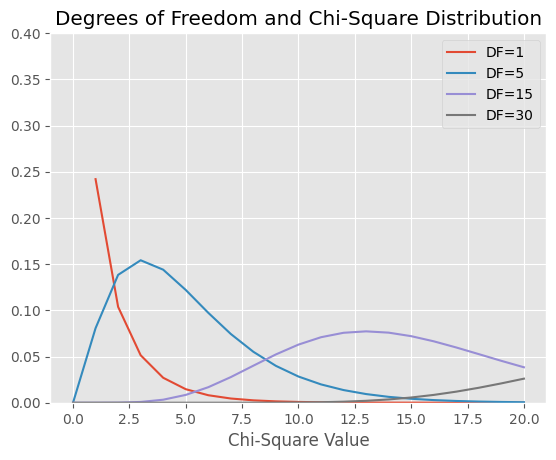

In [54]:
df_values = [1, 5, 15, 30]
chisq_values = np.arange(0, 21)
density_values = ss.chi2.pdf(chisq_values.reshape(-1, 1), df=df_values)

fig, ax = plt.subplots()
ax.plot(chisq_values, density_values[:, 0], label='DF=1')
ax.plot(chisq_values, density_values[:, 1], label='DF=5')
ax.plot(chisq_values, density_values[:, 2], label='DF=15')
ax.plot(chisq_values, density_values[:, 3], label='DF=30')
ax.set_ylim(0, 0.4)
ax.set_title('Degrees of Freedom and Chi-Square Distribution')
ax.set_xlabel('Chi-Square Value')
ax.legend()
plt.show()

カイ自乗値の分布は**自由度**（じゆうど）によって異なる。自由度については先に述べたので、詳細は省くが、カイ自乗検定では形式的に（行数-１）×（列数−１）という式で自由度が求まる。2行2列の場合は1となる。

独立性の検定では、カイ自乗分布の右裾の確率を考える（ちなみに、左側は観測値と期待値が近すぎる確率として使われることがある）。右側の面積が 0.05 となる x 軸の値を調べ、分割表から求められたカイ自乗値と比較するのである。後者の値が、前者の値よりも大きければ、帰無仮説を棄却する。


自由度1のカイ自乗値分布で右側の棄却点となる値は約 3.84 だが、今回求まったカイ自乗値は、約0.36なので、これよりも小さい。よって、帰無仮説を棄却することはできない。

最初の例に戻ると、サイトのデザインの違いがコンバージョンの有無に影響していると判断することができないことになる。

以上が原理であるが、ソフトウェアでは以下のようにして結論を出すことができる。

In [55]:
AB = np.array([[65,185], [35,115]])
AB
ss.chi2_contingency(AB, correction=False)

Chi2ContingencyResult(statistic=0.3555555555555555, pvalue=0.5509849875850935, dof=1, expected_freq=array([[ 62.5, 187.5],
       [ 37.5, 112.5]]))

出力は順に、カイ二乗統計量、p値、自由度、期待度数の表である。


なお、ここでデータ（頻度表）を作成するのに、` np.array([[65,185],[35,115]])` としている。鉤括弧内部にさらに鉤括弧があるが、これは2次元配列というデータを作成する命令となっている。

## 6.8　分散分析

t検定は二つの標本の平均値に有意差があるかどうかを調べる方法であった。それでは、三つ以上の平均値を比較するにはどうすればいいだろうか。

先に探索的分析で鶏の餌が種類が生育に与える影響を箱ひげ図で確認した。見方を変えると、これは餌の種類ごと標本があり、それぞれの標本平均値から、母集団でも、水準ごとの平均値に差があるかどうかを確認する課題である。

餌の水準ごとに平均値と分散を求めてみよう。

In [56]:
chickwts = pd.read_csv("https://infoart.ait231.tokushima-u.ac.jp/DS/data/chickwts.csv")
chickwts.groupby('feed').agg(['mean', 'var'])

weight             
                 mean          var
feed                              
casein     323.583333  4151.719697
horsebean  160.200000  1491.955556
linseed    218.750000  2728.568182
meatmeal   276.909091  4212.090909
soybean    246.428571  2929.956044
sunflower  328.916667  2384.992424

ここで餌という要因（カテゴリ変数）には6つの水準がある。ペアごとにt検定を実施することが思い浮かぶかも知れない。これを**多重比較**（たじゅうひかく：multiple comparison）という。

しかし、この方法は適切ではない。この場合、組み合わせは15ペアになる。

In [57]:
from scipy.special import comb
comb(6,2)

15.0

ところで、統計的検定では棄却水準を決めて帰無仮説を判断するが、仮に5％を水準とすると**第１種の誤り**の確率は0.05ということになる。これは見方を変えると、実際には平均値に差がなくと、20回に1回は有意という結果が得られることである。このデータの場合、15ペアあるのだから、そのどれかが偶然で有意と判断されてしまう確率が高くなることは想像できるだろう。

仮にデータの水準が3つあるとする。実は、この3つそれぞれの平均値は同じ、つまり差がなかったとする。ここで各ペアごとに3回の検定を行う。それぞれの検定で（正しく）差がないと判断する確率は 0.95 であり、（誤って）有意差がでてしまう確率は5％である。3回の検定すべてにおいて（正しく）有意差はないという結果が出る確率は 0.95 の3乗、つまり 約 0.86 となる。

これは、逆にいうと、3回のうち1回以上有意な差がでてしまう確率が 1-0.86=0.14 ということになる。つまり、実質的に棄却水準が 0.14 と甘く設定されたのに等しい。同じように考え、検定を15回すると棄却水準は極めて甘くなり、約 0.54 となってしまう。つまり、実際には平均値に差はないにも関わらず、「有意差がある」と判断されるペアが1つ以上確認される確率が50％以上あることになる。

この場合、もっとも単純な対処方法は0.05を15で割った値を棄却水準にしてしまうことである。ただし、このようにすると、今度は実際には差があるのにその差を検出できないという問題が生じる。つまり**第２種の誤り**をおかす可能性が高くなる。そこで、第２種の誤りをおかす確率を下げつつも、第一種の誤りをおかす確率は上げない方法が複数提案されている。本書では詳細は省き、ソフトウェアで多重検定を行う方法を紹介するに留める。

### 6.8.1　多重比較法

ここで紹介するTukeyの多重比較法 (Tukey honestly significant difference) では、各群の分布が正規分布に従っており、かつ、それぞれの分散が等しいという仮定が設定されている。この条件が満たされていない場合は、ノンパラメトリックな多重比較を利用する必要がある（例えば、Steel-Dwassの方法がある）。

TukeyのHSDでは、t値の計算方法が異なる。t検定の計算では群ごとのばらつき（分散）を分母においたが、Tukey では群ごとの分散を合計して自由度で割った誤差分散という値が使われる。このt値をt分布ではなく、スチューデント化された範囲の分布 (studentized range distribution) と照合する。

In [58]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
res = pairwise_tukeyhsd(chickwts['weight'], groups=chickwts['feed'], alpha=0.01)
print(res.summary())

     Multiple Comparison of Means - Tukey HSD, FWER=0.01      
  group1    group2   meandiff p-adj    lower    upper   reject
--------------------------------------------------------------
   casein horsebean -163.3833    0.0 -245.9644 -80.8023   True
   casein   linseed -104.8333 0.0002 -183.5713 -26.0954   True
   casein  meatmeal  -46.6742 0.3325 -127.1818  33.8333  False
   casein   soybean  -77.1548 0.0084 -153.0285   -1.281   True
   casein sunflower    5.3333 0.9999  -73.4046  84.0713  False
horsebean   linseed     58.55 0.1413   -24.031  141.131  False
horsebean  meatmeal  116.7091 0.0001   32.4391 200.9791   True
horsebean   soybean   86.2286 0.0042    6.3737 166.0834   True
horsebean sunflower  168.7167    0.0   86.1356 251.2977   True
  linseed  meatmeal   58.1591 0.1277  -22.3484 138.6666  False
  linseed   soybean   27.6786 0.7933  -48.1952 103.5523  False
  linseed sunflower  110.1667 0.0001   31.4287 188.9046   True
 meatmeal   soybean  -30.4805 0.7391 -108.1891  47.2281

出力では、餌の種類ごとにペアを15組作成し、それぞれについて体重の平均値に5％水準で有意な差があるかどうかを一覧にしている。右端の`reject`が`True`の場合、そのペアの平均値には差があるということになる。多重比較の結果は、次のようにしてグラフにすることもできる。

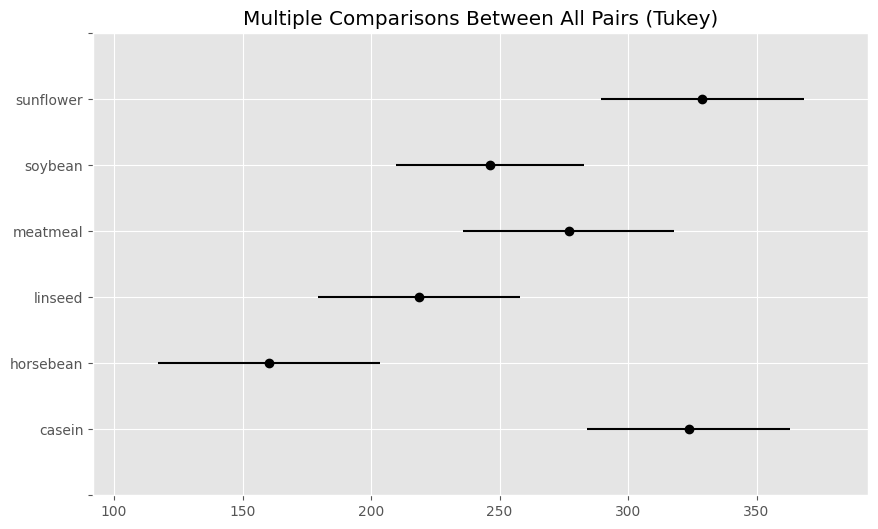

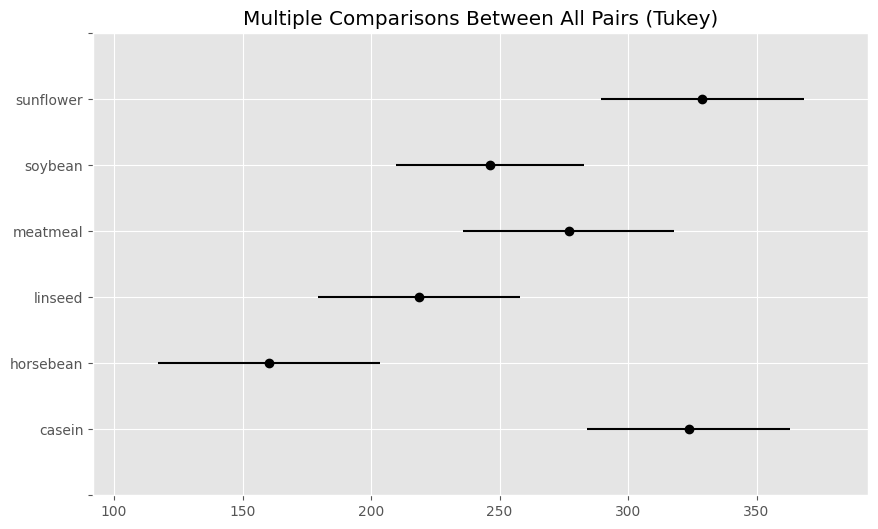

In [59]:
res.plot_simultaneous()

このグラフでは左端に表示された餌の水準ごとに、平均値の95％信頼区間が表示されている。

一般に標本平均値は、母平均値と一致することはない。しかし、標本平均値を中心にある範囲内に、本当の平均値（母平均値）があると考える。範囲を求めるには、母集団の分散が必要なのだが、一般に母集団の分散はわかっていない。そこで標本分散で代用するわけだが、標本分散で代用した平均値の分布はｔ分布になる。そこで、ここでも範囲を求めるためにｔ値をつかう。具体的には、範囲は「ｔ値 × 標本標準偏差 × 標本サイズの平方根」として求められる。

そこで、以下の計算を行う。

- 下限： 標本平均値 − ｔ値 × 標本標準偏差 × 標本サイズの平方根
- 上限： 標本平均値 ＋ ｔ値 × 標本標準偏差 × 標本サイズの平方根

この下限と上限の範囲を95％信頼区間（しんらいくかん：confidence interval）という。

グラフで出力された太い横線は、それぞれの餌での平均値の95％信頼区間を表している。あるペアでこの信頼区間が重なっていない場合、そのペアの平均値には有意な差があると考えることができる。

たとえば一番下の casein は、すぐうえのhorsebeanと線が重なっていない。つまり、caseiとhorosebeanでは、体重の平均値に有意な差があると判断できる。一方、meatmeal の95％信頼区間とは重なりがある。そこで、caseinとmeatmealでは、体重の平均値に差はないと考えられる。

## 小テスト

このコンテンツを読んだあと、
**「第6週小テスト（全員かならず回答すること）」**
を忘れずに受験すること。受験したことで、第6週の講義に出席したものとする。



